**MACHINE LEARNING COURSEWORK**

In [ ]:
#Importing all the required libraries for the coursework.
import numpy as np # A useful package for dealing with mathematical processes, it can deal with multi-dimensional arrays such as matrices intuitively.
import pandas as pd #a common package for viewing tabular data
import matplotlib.pyplot as plt #We will be using Matplotlib for our graphs
import sklearn.linear_model, sklearn.datasets # sklearn is an important package for much of the ML we will be doing, this time we are using the Linear Regression Model and the datasets
from sklearn import kernel_ridge # For one exercise I will also be demonstrating Kernal Ridge Regression
import tensorflow as tf # Tensor flow is a key package for performing automatic differntiation (the gradient descent we use for optimisation)
from sklearn.preprocessing import StandardScaler, MinMaxScaler # We will be using the imbuilt sclaing functions sklearn provides
import time # We will be using this to time the efficiency of vectorisation
from mpl_toolkits import mplot3d # Used to make a 3D plot used to demonstrate multidimensional relationships.
from sklearn.preprocessing import PolynomialFeatures # A preprocessing function allowing us to include polynomial features into our model
from sklearn.preprocessing import LabelEncoder, OneHotEncoder # We will be using these to encode categorical features


In [ ]:

from google.colab import files

uploaded = files.upload()   

MyDataFrame = pd.read_csv('CustomerIncome.csv')

Saving CustomerIncome.csv to CustomerIncome.csv


In [ ]:
MyDataFrame.head(10)#Printing the first 10 rows of the dataset "Customer Income"

Age  SiteSpending  SiteTime  RecommendImpression Education        WorkType  \
0   32        314.06     30.14                    0    Degree  Private sector   
1   20       3758.36    149.36                    4      GCSE  Private sector   
2   36        601.72     21.87                    0   Masters  Private sector   
3   21         44.89    182.80                    9   Masters  Private sector   
4   24        614.80    194.34                    0      GCSE  Private sector   
5   23        722.15    137.46                    6     Other      Unemployed   
6   44        312.80    114.88                    0    Degree  Private sector   
7   39         40.43    194.19                    4    Degree  Private sector   
8   42         45.47    118.04                    3   A Level  Private sector   
9   40        218.73    285.48                    8      GCSE  Private sector   

      Sex            Region    Salary  
0    Male            London  60173.49  
1  Female        South East  42965.45  
2    Male   East of England  54924.41  
3  Female  Northern Ireland  26734.99  
4    Male          Scotland  15325.23  
5    Male            London  27492.87  
6  Female     West Midlands  49823.60  
7    Male  Northern Ireland  47015.24  
8  Female  Northern Ireland  45222.28  
9  Female        South West  41750.35

**Part 3 – Regression**

**LABEL** **ENCODING** 

In [ ]:
MyDataFrame1 = MyDataFrame.copy() # We will be making copies of the dataset as we will be making changes to the columns as we go along

# create an object of the LabelEncoder class
lblEncoder_X = LabelEncoder()   
# apply LblEncoder object to our categorical variables. This returns the column encoded.
MyDataFrame1['Sex'] = lblEncoder_X.fit_transform(MyDataFrame['Sex']) 
MyDataFrame1['WorkType'] = lblEncoder_X.fit_transform(MyDataFrame['WorkType']) 
MyDataFrame1['Region'] = lblEncoder_X.fit_transform(MyDataFrame['Region']) 
MyDataFrame1['Education'] = lblEncoder_X.fit_transform(MyDataFrame['Education']) 
print(MyDataFrame1) 

     Age  SiteSpending  SiteTime  RecommendImpression  Education  WorkType  \
0     32        314.06     30.14                    0          1         0   
1     20       3758.36    149.36                    4          2         0   
2     36        601.72     21.87                    0          3         0   
3     21         44.89    182.80                    9          3         0   
4     24        614.80    194.34                    0          2         0   
..   ...           ...       ...                  ...        ...       ...   
995   56        177.67    272.87                    5          2         1   
996   54        155.42    231.17                    5          5         0   
997   22       2376.10    287.15                   11          5         0   
998   49       4355.04     27.78                    0          1         0   
999   51         40.43    188.38                    9          6         0   

     Sex  Region    Salary  
0      1       2  60173.49  
1    

**CORRELATION**

In [ ]:
#Correlation after encoding

import seaborn as sns
fig = plt.figure(figsize =(12, 7))
sns.heatmap(MyDataFrame1[['Age','SiteSpending','SiteTime','RecommendImpression','Education','WorkType','Sex','Region','Salary']].corr(), cmap='YlGnBu', annot=True,linewidths=2, linecolor='black')
plt.show()

**SCALING**(Min-Max Scale)

In [ ]:
MyDataFrame1=(MyDataFrame1-MyDataFrame1.min())/(MyDataFrame1.max()-MyDataFrame1.min())
MyDataFrame1.head()

Age  SiteSpending  SiteTime  RecommendImpression  Education  WorkType  \
0  0.206349      0.062878  0.084627             0.000000   0.166667       0.0   
1  0.015873      0.854345  0.487710             0.235294   0.333333       0.0   
2  0.269841      0.128979  0.056666             0.000000   0.500000       0.0   
3  0.031746      0.001025  0.600771             0.529412   0.500000       0.0   
4  0.079365      0.131985  0.639788             0.000000   0.333333       0.0   

   Sex    Region    Salary  
0  1.0  0.181818  0.359470  
1  0.0  0.636364  0.229875  
2  1.0  0.090909  0.319939  
3  0.0  0.454545  0.107643  
4  1.0  0.545455  0.021716

In [ ]:
# Shuffle dataset for a random sample, as we will not be using the entire dataset
rng = np.random.default_rng(0) # This sets the random seed, meaning that we will get the SAME random sample if we rerun this cell.
df = MyDataFrame1.iloc[rng.permutation(len(MyDataFrame1))].reset_index(drop=True) # Shuffle data


In [ ]:

Xy_df = df[['Age','SiteSpending','SiteTime','RecommendImpression','Education','Sex','Salary']]

# So for this task we are going to be predicting the Salary

# prepare NumPy ndarrays
X = np.array(Xy_df[['Age','SiteSpending','SiteTime','RecommendImpression','Education','Sex']]) 
y = np.array(Xy_df['Salary'])

#test and training data we want
n_train_points = 900 # This is the data that will be used to train our model 
n_new_points = 100 # This is the data that will be used to test the accuracy of our model.  

# Split the feature data into training/new data
X_train = X[:n_train_points] # This will select the data points from 0 to the number defined in n_train_points
X_new = X[n_train_points:n_train_points+n_new_points] 

# Split the target data into training/new data
y_train = y[:n_train_points]
y_true = y[n_train_points:n_train_points+n_new_points]


**1) LINEAR REGRESSION**

Mean squared error loss: 0.0175
R2 score: 0.3807


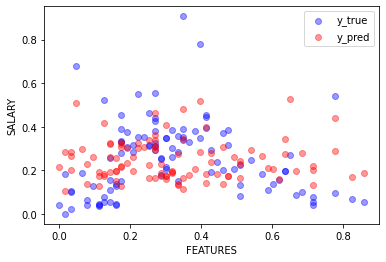

In [ ]:
# Create linear regression object
obj = sklearn.linear_model.LinearRegression(fit_intercept=True)

# Train the model using the training sets
obj.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = obj.predict(X_new)

# The mean squared error loss
print('Mean squared error loss: {:.4f}'.format(sklearn.metrics.mean_squared_error(y_true, y_pred)))
# The R2 score: 1 is perfect prediction
print('R2 score: {:.4f}'.format(sklearn.metrics.r2_score(y_true, y_pred)))
X_new_disp = X_new[:,0] # We will need to make a special vector for the feature we want on the x axis, as now X is a matrix matplotlib can't use it for a scatter plot

# Plot outputs
plt.scatter(X_new_disp, y_true,  color='blue', label='y_true',alpha= 0.4) # Observed y values
plt.scatter(X_new_disp, y_pred, color='red', label='y_pred',alpha= 0.4) # predicted y values

plt.xlabel('FEATURES')
plt.ylabel('SALARY')
plt.legend()
plt.show()

**2) KERNEL RIDGE using "rbf" Kernel**

Mean squared error loss: 0.0155
R2 score: 0.4519


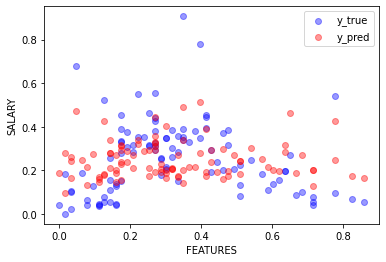

In [ ]:
obj = kernel_ridge.KernelRidge(kernel='rbf')

# Train the model using the training sets
obj.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = obj.predict(X_new)
# The mean squared error loss
print('Mean squared error loss: {:.4f}'.format(sklearn.metrics.mean_squared_error(y_true, y_pred)))
# The R2 score: 1 is perfect prediction
print('R2 score: {:.4f}'.format(sklearn.metrics.r2_score(y_true, y_pred)))
# Plot outputs
plt.scatter(X_new_disp, y_true,  color='blue', label='y_true',alpha= 0.4) # Observed y values
plt.scatter(X_new_disp, y_pred, color='red', label='y_pred',alpha= 0.4) # predicted y values

plt.xlabel('FEATURES')
plt.ylabel('SALARY')
plt.legend()
plt.show()

**3) KERNEL RIDGE using "laplacian" Kernel**

In [ ]:

obj = kernel_ridge.KernelRidge(kernel='laplacian')

# Train the model using the training sets
obj.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = obj.predict(X_new)
# The mean squared error loss
print('Mean squared error loss: {:.4f}'.format(sklearn.metrics.mean_squared_error(y_true, y_pred)))
# The R2 score: 1 is perfect prediction
print('R2 score: {:.4f}'.format(sklearn.metrics.r2_score(y_true, y_pred)))
X_new_disp = X_new[:,0]
# Plot outputs
plt.scatter(X_new_disp, y_true,  color='blue', label='y_true', alpha= 0.4) # Observed y values
plt.scatter(X_new_disp, y_pred, color='red', label='y_pred', alpha= 0.4) # predicted y values

plt.xlabel('FEATURES')
plt.ylabel('SALARY')
plt.legend()
plt.show()


Mean squared error loss: 0.0055
R2 score: 0.8061


**4) Random Forest Regressor Model **

Mean squared error loss: 0.0026
R2 score: 0.9076


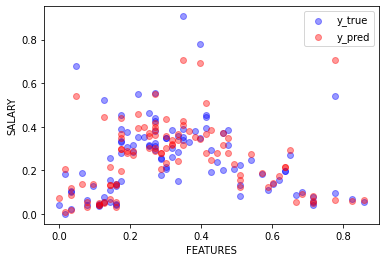

In [ ]:
from sklearn.ensemble import RandomForestRegressor

obj = RandomForestRegressor(n_estimators=100, random_state=1)

# Train the model using the training sets
obj.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = obj.predict(X_new)
# The mean squared error loss
print('Mean squared error loss: {:.4f}'.format(sklearn.metrics.mean_squared_error(y_true, y_pred)))
# The R2 score: 1 is perfect prediction
print('R2 score: {:.4f}'.format(sklearn.metrics.r2_score(y_true, y_pred)))
X_new_disp = X_new[:,0]
# Plot outputs
plt.scatter(X_new_disp, y_true,  color='blue', label='y_true', alpha= 0.4) # Observed y values
plt.scatter(X_new_disp, y_pred, color='red', label='y_pred', alpha= 0.4) # predicted y values

plt.xlabel('FEATURES')
plt.ylabel('SALARY')
plt.legend()
plt.show()


**Part 4 – Binary** **Classification**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [ ]:

from google.colab import files

uploaded = files.upload()   

dataset = pd.read_csv('CustomerIncome.csv')

dataset.head()

Saving CustomerIncome.csv to CustomerIncome (1).csv


Age  SiteSpending  SiteTime  RecommendImpression Education        WorkType  \
0   32        314.06     30.14                    0    Degree  Private sector   
1   20       3758.36    149.36                    4      GCSE  Private sector   
2   36        601.72     21.87                    0   Masters  Private sector   
3   21         44.89    182.80                    9   Masters  Private sector   
4   24        614.80    194.34                    0      GCSE  Private sector   

      Sex            Region    Salary  
0    Male            London  60173.49  
1  Female        South East  42965.45  
2    Male   East of England  54924.41  
3  Female  Northern Ireland  26734.99  
4    Male          Scotland  15325.23

In [ ]:
dataset['Salary'] = np.where(dataset['Salary'] > 35000, 1, 0) #Categorizing salary into two classes
dataset.head()

Age  SiteSpending  SiteTime  RecommendImpression Education        WorkType  \
0   32        314.06     30.14                    0    Degree  Private sector   
1   20       3758.36    149.36                    4      GCSE  Private sector   
2   36        601.72     21.87                    0   Masters  Private sector   
3   21         44.89    182.80                    9   Masters  Private sector   
4   24        614.80    194.34                    0      GCSE  Private sector   

      Sex            Region  Salary  
0    Male            London       1  
1  Female        South East       1  
2    Male   East of England       1  
3  Female  Northern Ireland       0  
4    Male          Scotland       0

In [ ]:
lblEncoder_X = LabelEncoder() 

dataset['Sex'] = lblEncoder_X.fit_transform(dataset['Sex']) 
dataset['WorkType'] = lblEncoder_X.fit_transform(dataset['WorkType']) 
dataset['Region'] = lblEncoder_X.fit_transform(dataset['Region']) 
dataset['Education'] = lblEncoder_X.fit_transform(dataset['Education']) 
dataset.head()


Age  SiteSpending  SiteTime  RecommendImpression  Education  WorkType  Sex  \
0   32        314.06     30.14                    0          1         0    1   
1   20       3758.36    149.36                    4          2         0    0   
2   36        601.72     21.87                    0          3         0    1   
3   21         44.89    182.80                    9          3         0    0   
4   24        614.80    194.34                    0          2         0    1   

   Region  Salary  
0       2       1  
1       7       1  
2       1       1  
3       5       0  
4       6       0

In [ ]:
dataset=(dataset-dataset.min())/(dataset.max()-dataset.min()) #Min Max Scaling
dataset.head()

Age  SiteSpending  SiteTime  RecommendImpression  Education  WorkType  \
0  0.206349      0.062878  0.084627             0.000000   0.166667       0.0   
1  0.015873      0.854345  0.487710             0.235294   0.333333       0.0   
2  0.269841      0.128979  0.056666             0.000000   0.500000       0.0   
3  0.031746      0.001025  0.600771             0.529412   0.500000       0.0   
4  0.079365      0.131985  0.639788             0.000000   0.333333       0.0   

   Sex    Region  Salary  
0  1.0  0.181818     1.0  
1  0.0  0.636364     1.0  
2  1.0  0.090909     1.0  
3  0.0  0.454545     0.0  
4  1.0  0.545455     0.0

In [ ]:
#Correlation ranges from -1 to +1. Values closer to zero means there is no linear trend between the two variables. The close to 1 the correlation is the more positively correlated they are; that is as one increases so does the other and the closer to 1 the stronger this relationship is.

import seaborn as sns
fig = plt.figure(figsize =(12, 7))
sns.heatmap(dataset[['Age','SiteSpending','SiteTime','RecommendImpression','Education','WorkType','Sex','Region','Salary']].corr(), cmap='BuPu', annot=True,linewidths=2, linecolor='black')
plt.show()

In [ ]:
X = dataset.drop(["Salary","WorkType","Region"], axis=1)#drop the columns not needed in the features

Y = dataset["Salary"]#target

In [ ]:
X


Age  SiteSpending  SiteTime  RecommendImpression  Education  Sex
0    0.206349      0.062878  0.084627             0.000000   0.166667  1.0
1    0.015873      0.854345  0.487710             0.235294   0.333333  0.0
2    0.269841      0.128979  0.056666             0.000000   0.500000  1.0
3    0.031746      0.001025  0.600771             0.529412   0.500000  0.0
4    0.079365      0.131985  0.639788             0.000000   0.333333  1.0
..        ...           ...       ...                  ...        ...  ...
995  0.587302      0.031536  0.905298             0.294118   0.333333  0.0
996  0.555556      0.026424  0.764310             0.294118   0.833333  1.0
997  0.047619      0.536715  0.953579             0.647059   0.833333  1.0
998  0.476190      0.991456  0.076647             0.000000   0.166667  1.0
999  0.507937      0.000000  0.619637             0.529412   1.000000  1.0

[1000 rows x 6 columns]

In [ ]:
Y

0      1.0
1      1.0
2      1.0
3      0.0
4      0.0
      ... 
995    0.0
996    0.0
997    1.0
998    1.0
999    1.0
Name: Salary, Length: 1000, dtype: float64

In [ ]:
a=dataset["Salary"] #Checking how many 0s and 1s are there in the Salary Column

(a == 0).sum().sum()
(a == 1).sum().sum()

631

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)#Split

In [ ]:
obj1 = DecisionTreeClassifier()

# Train the model using the training sets
obj1.fit(x_train, y_train)

# Make predictions using the testing set
y_new_pred = obj1.predict(x_test)

# The accuracy score: 1 for perfect prediction
print('Accuracy: {:.4f}'.format(sklearn.metrics.accuracy_score(y_test, y_new_pred)))
# Confusion matrix
confusion_mat = sklearn.metrics.confusion_matrix(y_test, y_new_pred)
print('Confusion matrix: ', confusion_mat)
# Visualize the confusion matrix
sklearn.metrics.ConfusionMatrixDisplay(confusion_mat, display_labels=['Less than 35000', 'Greater than 35000']).plot(cmap=plt.cm.Blues)
plt.grid(False)
# The classification report, which contains accuracy, precision, recall, F1 score
print(sklearn.metrics.classification_report(y_test, y_new_pred))

Accuracy: 0.9100
Confusion matrix:  [[ 89  12]
 [ 15 184]]
              precision    recall  f1-score   support

         0.0       0.86      0.88      0.87       101
         1.0       0.94      0.92      0.93       199

    accuracy                           0.91       300
   macro avg       0.90      0.90      0.90       300
weighted avg       0.91      0.91      0.91       300



In [ ]:
obj1 = RandomForestClassifier()

# Train the model using the training sets
obj1.fit(x_train, y_train)

# Make predictions using the testing set
y_new_pred = obj1.predict(x_test)

# The accuracy score: 1 for perfect prediction
print('Accuracy: {:.4f}'.format(sklearn.metrics.accuracy_score(y_test, y_new_pred)))
# Confusion matrix
confusion_mat = sklearn.metrics.confusion_matrix(y_test, y_new_pred)
print('Confusion matrix: ', confusion_mat)
# Visualize the confusion matrix
sklearn.metrics.ConfusionMatrixDisplay(confusion_mat, display_labels=['Less than 35000', 'Greater than 35000']).plot(cmap=plt.cm.Blues)
plt.grid(False)
# The classification report, which contains accuracy, precision, recall, F1 score
print(sklearn.metrics.classification_report(y_test, y_new_pred))

Accuracy: 0.9300
Confusion matrix:  [[ 90  11]
 [ 10 189]]
              precision    recall  f1-score   support

         0.0       0.90      0.89      0.90       101
         1.0       0.94      0.95      0.95       199

    accuracy                           0.93       300
   macro avg       0.92      0.92      0.92       300
weighted avg       0.93      0.93      0.93       300



Accuracy: 0.8600
Confusion matrix:  [[ 69  32]
 [ 10 189]]
              precision    recall  f1-score   support

         0.0       0.87      0.68      0.77       101
         1.0       0.86      0.95      0.90       199

    accuracy                           0.86       300
   macro avg       0.86      0.82      0.83       300
weighted avg       0.86      0.86      0.86       300



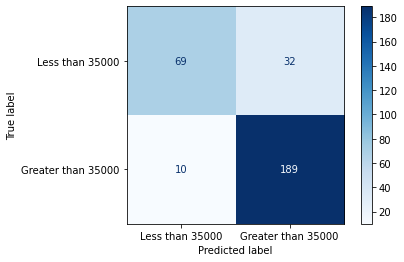

In [ ]:
import sklearn.svm 

# Create support vector classifier object
obj1 = sklearn.svm.SVC(C=1,kernel='rbf',random_state=40)

# Train the model using the training sets
obj1.fit(x_train, y_train)

# Make predictions using the testing set
y_new_pred = obj1.predict(x_test)

# The accuracy score: 1 for perfect prediction
print('Accuracy: {:.4f}'.format(sklearn.metrics.accuracy_score(y_test, y_new_pred)))
# Confusion matrix
confusion_mat = sklearn.metrics.confusion_matrix(y_test, y_new_pred)
print('Confusion matrix: ', confusion_mat)
# Visualize the confusion matrix
sklearn.metrics.ConfusionMatrixDisplay(confusion_mat, display_labels=['Less than 35000', 'Greater than 35000']).plot(cmap=plt.cm.Blues)
plt.grid(False)
# The classification report, which contains accuracy, precision, recall, F1 score
print(sklearn.metrics.classification_report(y_test, y_new_pred))

**Part 5 – Neural Networks**

In [ ]:
import numpy as np # A useful package for dealing with mathematical processes, we will be using it this week for vectors and matrices
import pandas as pd # A common package for viewing tabular data
import sklearn.datasets # We want to be able to access the sklearn datasets again
from sklearn.preprocessing import StandardScaler # We will be using the imbuilt scaling functions sklearn provides
import matplotlib.pyplot as plt # We will be using Matplotlib for our graphs
from sklearn.model_selection import train_test_split # A library that can automatically perform data splitting for us
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, f1_score, classification_report, balanced_accuracy_score # Various classification metrics we may find useful

# Below are a wide selection of tensorflow libraries we will need to construct our Neural networks.
from tensorflow.keras.activations import sigmoid, linear, relu # Activation functions we will use
from tensorflow.keras.models import Model, Sequential # Different mays of constructing models, we will primarily be covering the 'functional api' which uses `Model`
from tensorflow.keras.optimizers import SGD # We will be using the SGD optimiser today, though there are other options you may want to explore (such as Adam)
from tensorflow.keras.losses import MeanSquaredError, BinaryCrossentropy  # We will be using TFs MSE loss function for regression and BinaryCross Entropy for classification.
from tensorflow.keras.layers import Input, Dense, Dropout # The layers we will be using to construct our network.
from tensorflow.keras.regularizers import L1, L2 # Regularisation being used in model layers
from tensorflow.keras.metrics import BinaryAccuracy # Accuracy Metric for classification
from tensorflow.keras.callbacks import EarlyStopping # Allows Early Stopping regularisation method.

In [168]:

from google.colab import files

uploaded = files.upload()   

df = pd.read_csv('CustomerIncome.csv')

#df.head()
df.info()

Saving CustomerIncome.csv to CustomerIncome (15).csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  1000 non-null   int64  
 1   SiteSpending         1000 non-null   float64
 2   SiteTime             1000 non-null   float64
 3   RecommendImpression  1000 non-null   int64  
 4   Education            1000 non-null   object 
 5   WorkType             1000 non-null   object 
 6   Sex                  1000 non-null   object 
 7   Region               1000 non-null   object 
 8   Salary               1000 non-null   float64
dtypes: float64(3), int64(2), object(4)
memory usage: 70.4+ KB


In [169]:
df.drop(['Region', 'WorkType'], axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  1000 non-null   int64  
 1   SiteSpending         1000 non-null   float64
 2   SiteTime             1000 non-null   float64
 3   RecommendImpression  1000 non-null   int64  
 4   Education            1000 non-null   object 
 5   Sex                  1000 non-null   object 
 6   Salary               1000 non-null   float64
dtypes: float64(3), int64(2), object(2)
memory usage: 54.8+ KB


In [170]:
df['Salary'] = np.where(df['Salary'] > 35000, 1, 0)
df.head()

Age  SiteSpending  SiteTime  RecommendImpression Education     Sex  Salary
0   32        314.06     30.14                    0    Degree    Male       1
1   20       3758.36    149.36                    4      GCSE  Female       1
2   36        601.72     21.87                    0   Masters    Male       1
3   21         44.89    182.80                    9   Masters  Female       0
4   24        614.80    194.34                    0      GCSE    Male       0

In [171]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder # We will be using these to encode categorical features
lblEncoder_X = LabelEncoder() 

df['Sex'] = lblEncoder_X.fit_transform(df['Sex']) 
df['Education'] = lblEncoder_X.fit_transform(df['Education']) 
df.head()

Age  SiteSpending  SiteTime  RecommendImpression  Education  Sex  Salary
0   32        314.06     30.14                    0          1    1       1
1   20       3758.36    149.36                    4          2    0       1
2   36        601.72     21.87                    0          3    1       1
3   21         44.89    182.80                    9          3    0       0
4   24        614.80    194.34                    0          2    1       0

In [172]:
df['Salary'].value_counts()# check distribution of target variable

1    631
0    369
Name: Salary, dtype: int64

In [173]:
# prepare NumPy ndarrays
X = df.drop(['Salary'], axis=1)
Y = df['Salary']

# convert to numpy arrays
X_raw = X.to_numpy()
Y = Y.to_numpy()

# Split the data into training/test data


X_nontest_raw, X_test_raw, Y_nontest, Y_test = train_test_split(X_raw, Y, test_size=0.10, shuffle=True, random_state=0)
X_train_raw, X_valid_raw, Y_train, Y_valid = train_test_split(X_nontest_raw, Y_nontest, test_size=0.15, shuffle=True, random_state=0)

scaler = StandardScaler()#Scaling using standard scaler
scaler.fit(X_train_raw)
X_train = scaler.transform(X_train_raw)
X_valid = scaler.transform(X_valid_raw)
X_test = scaler.transform(X_test_raw)

In [174]:
print('The shape of `X_train`:', X_train.shape)
print('The shape of `X_valid`:', X_valid.shape)
print('The shape of `X_test`:', X_test.shape)

The shape of `X_train`: (765, 6)
The shape of `X_valid`: (135, 6)
The shape of `X_test`: (100, 6)


In [175]:
# Define the regularizer.
alpha = 0.01
kernel_regularizer = L2(l2=alpha)

# Define the `Dense` layer.

#  as we are performing binary classification, we specify `activation=sigmoid`.
#  apply l2 regularization on the kernel parameters by specifying a `kernel_regularizer` argument.
dense_layer_1 = Dense(units=10, activation=relu, kernel_regularizer=kernel_regularizer)
output_layer = Dense(units=1, activation=sigmoid, kernel_regularizer=kernel_regularizer)

# Define the "virtual" input
input = Input(shape=X_train.shape[1:])

# Define the "virtual" output
output = dense_layer_1(input)
output = output_layer(output)

# Define the neural network model.
model = Model(inputs=[input], outputs=[output])

# Output the summary of the model.
model.summary()


Model: "model_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_13 (InputLayer)       [(None, 6)]               0         
                                                                 
 dense_24 (Dense)            (None, 10)                70        
                                                                 
 dense_25 (Dense)            (None, 1)                 11        
                                                                 
Total params: 81
Trainable params: 81
Non-trainable params: 0
_________________________________________________________________


In [176]:
#  the optimization algorithm and the loss function.
# the vanilla stochastic gradient descent 


sgd = SGD(learning_rate=0.05)
ce = BinaryCrossentropy()
acc = BinaryAccuracy()
model.compile(optimizer=sgd, loss=ce, metrics=[acc])

In [177]:
# Train the model.
# `epochs` determines the number of epochs.
# `batch_size` determines the batch_size.

history = model.fit(X_train, Y_train, batch_size=100, epochs=60, validation_data=(X_valid, Y_valid))


# Plot validation MSE, alwys nice to have plots to help us visualise things!
plt.plot(history.history['binary_accuracy'], label='accuracy')
plt.plot(history.history['val_binary_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

Epoch 1/60
8/8 [==============================] - 1s 27ms/step - loss: 0.9276 - binary_accuracy: 0.4261 - val_loss: 0.8838 - val_binary_accuracy: 0.4296
Epoch 2/60
8/8 [==============================] - 0s 7ms/step - loss: 0.8476 - binary_accuracy: 0.4627 - val_loss: 0.8181 - val_binary_accuracy: 0.4519
Epoch 3/60
8/8 [==============================] - 0s 6ms/step - loss: 0.7989 - binary_accuracy: 0.4810 - val_loss: 0.7763 - val_binary_accuracy: 0.4963
Epoch 4/60
8/8 [==============================] - 0s 8ms/step - loss: 0.7674 - binary_accuracy: 0.5203 - val_loss: 0.7495 - val_binary_accuracy: 0.5481
Epoch 5/60
8/8 [==============================] - 0s 6ms/step - loss: 0.7468 - binary_accuracy: 0.5516 - val_loss: 0.7302 - val_binary_accuracy: 0.5778
Epoch 6/60
8/8 [==============================] - 0s 7ms/step - loss: 0.7315 - binary_accuracy: 0.6000 - val_loss: 0.7159 - val_binary_accuracy: 0.6000
Epoch 7/60
8/8 [==============================] - 0s 6ms/step - loss: 0.7198 - binary_a

In [178]:
ce_test, acc_test = model.evaluate(X_test, Y_test)
print('The cross entropy loss on the test data:', ce_test)
print('The accuracy on the test data:', acc_test)

4/4 [==============================] - 0s 3ms/step - loss: 0.5040 - binary_accuracy: 0.8300
The cross entropy loss on the test data: 0.5039919018745422
The accuracy on the test data: 0.8299999833106995


In [179]:
Y_test_logit = model.predict(X_test)
print(Y_test_logit[:10]) 

4/4 [==============================] - 0s 3ms/step
[[0.90944916]
 [0.20547983]
 [0.2353321 ]
 [0.94234204]
 [0.5012803 ]
 [0.80694854]
 [0.39597753]
 [0.7244956 ]
 [0.49983642]
 [0.658857  ]]


In [180]:
Y_test_pred = (Y_test_logit > 0.5).astype(int)
print(Y_test_pred[:10])

[[1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]]


In [181]:
disp = ConfusionMatrixDisplay(confusion_matrix(Y_test, Y_test_pred))
disp.plot(cmap=plt.cm.Blues)
plt.grid(False)

acc_test = accuracy_score(Y_test, Y_test_pred)
f1_test = f1_score(Y_test, Y_test_pred, pos_label=1)
print('The accuracy on the test data with the selected hyperparameter:', acc_test)
print('The F1 score on the test data with the selected hyperparameter:', f1_test)
pre_test = precision_score(Y_test, Y_test_pred, pos_label=1)
print('Precision on validation data:', pre_test)
reca_test = precision_score(Y_test, Y_test_pred, pos_label=1)
print('Recall on validation data:', reca_test)

The accuracy on the test data with the selected hyperparameter: 0.83
The F1 score on the test data with the selected hyperparameter: 0.8794326241134751
Precision on validation data: 0.8611111111111112
Recall on validation data: 0.8611111111111112


***Part 6 – Clustering***

In [ ]:
#Importing all the required libraries for K Means Clustering
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline


In [ ]:
#Importing the dataset "Customer Income"
from google.colab import files
uploaded = files.upload()   
df = pd.read_csv('CustomerIncome.csv')
df.info()

Saving CustomerIncome.csv to CustomerIncome.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  1000 non-null   int64  
 1   SiteSpending         1000 non-null   float64
 2   SiteTime             1000 non-null   float64
 3   RecommendImpression  1000 non-null   int64  
 4   Education            1000 non-null   object 
 5   WorkType             1000 non-null   object 
 6   Sex                  1000 non-null   object 
 7   Region               1000 non-null   object 
 8   Salary               1000 non-null   float64
dtypes: float64(3), int64(2), object(4)
memory usage: 70.4+ KB


Text(0, 0.5, 'Salary')

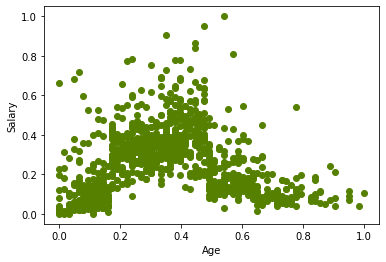

In [ ]:
#Plotting the scatter plot of Age and Salary
plt.scatter(df['Age'],df['Salary'],color='#558000')
plt.xlabel('Age')
plt.ylabel('Salary')

In [ ]:
#Here, "n_cluster" is the number of clusters. I have used 3 clusters. 
km = KMeans(n_clusters=4)
y_predicted = km.fit_predict(df[['Age','Salary']]) #Fitting the KMeans cluster to the columns Age and Salary to identify 3 clusters
y_predicted 

array([1, 2, 1, 2, 2, 2, 1, 1, 1, 1, 1, 2, 2, 3, 3, 1, 2, 1, 0, 2, 0, 1,
       1, 1, 2, 0, 1, 1, 0, 1, 1, 3, 3, 2, 0, 2, 3, 1, 0, 3, 0, 1, 1, 0,
       0, 1, 1, 2, 3, 3, 2, 2, 1, 1, 0, 3, 2, 1, 1, 0, 1, 1, 0, 2, 1, 2,
       1, 2, 3, 1, 0, 1, 2, 1, 2, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 3, 1, 3,
       0, 1, 0, 0, 1, 1, 1, 2, 2, 1, 1, 0, 0, 1, 0, 1, 1, 2, 0, 2, 2, 1,
       0, 0, 0, 1, 3, 3, 0, 1, 0, 2, 2, 0, 0, 3, 3, 0, 0, 1, 2, 0, 2, 1,
       1, 2, 2, 0, 2, 0, 1, 1, 3, 1, 1, 3, 2, 0, 0, 2, 0, 0, 0, 2, 2, 2,
       0, 2, 1, 1, 3, 1, 0, 3, 1, 0, 2, 2, 2, 1, 2, 1, 1, 0, 2, 0, 2, 3,
       1, 2, 1, 0, 1, 0, 1, 1, 0, 0, 1, 2, 0, 2, 0, 3, 1, 1, 0, 3, 1, 0,
       1, 1, 2, 0, 0, 0, 3, 0, 1, 2, 0, 0, 1, 1, 1, 2, 1, 2, 3, 1, 1, 3,
       2, 2, 2, 2, 1, 0, 1, 1, 1, 1, 3, 1, 3, 3, 2, 2, 0, 3, 1, 2, 1, 0,
       2, 2, 1, 2, 0, 0, 2, 0, 1, 3, 1, 0, 0, 3, 1, 2, 1, 0, 1, 2, 0, 2,
       1, 1, 2, 2, 1, 2, 1, 2, 1, 0, 1, 1, 2, 2, 3, 1, 1, 0, 3, 1, 2, 1,
       1, 1, 1, 1, 2, 0, 1, 1, 0, 2, 3, 1, 2, 2, 0,

In [ ]:
df['cluster']=y_predicted #Assigning a new column for the clusters indentified
df.head()#Printing first few rows

Age  SiteSpending  SiteTime  RecommendImpression Education  \
0  0.206349        314.06     30.14                    0    Degree   
1  0.015873       3758.36    149.36                    4      GCSE   
2  0.269841        601.72     21.87                    0   Masters   
3  0.031746         44.89    182.80                    9   Masters   
4  0.079365        614.80    194.34                    0      GCSE   

         WorkType     Sex            Region    Salary  cluster  
0  Private sector    Male            London  0.359470        1  
1  Private sector  Female        South East  0.229875        2  
2  Private sector    Male   East of England  0.319939        1  
3  Private sector  Female  Northern Ireland  0.107643        2  
4  Private sector    Male          Scotland  0.021716        2

In [ ]:
#Seperating the 3 identified clusters labels(0,1,2) into 3 different dataframes
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
df4 = df[df.cluster==3]

#Plotting the 3 dataframes with different colors
plt.scatter(df1['Age'],df1['Salary'],color='#00b8e6')
plt.scatter(df2['Age'],df2['Salary'],color='#cccc00')
plt.scatter(df3['Age'],df3['Salary'],color='#990000')
plt.scatter(df4['Age'],df4['Salary'],color='#003333')

plt.xlabel('Age')
plt.ylabel('Salary')
plt.legend()


In [ ]:
km.cluster_centers_ #Predicts the closest cluster in each sample

array([[0.63135593, 0.15304672],
       [0.30592758, 0.33128716],
       [0.10417448, 0.09700514],
       [0.39329806, 0.56317918]])

In [ ]:
#Plotting the scatter plot with cluster centers.
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
df4 = df[df.cluster==3]

plt.scatter(df1.Age,df1['Salary'],color='pink')
plt.scatter(df2.Age,df2['Salary'],color='yellow')
plt.scatter(df3.Age,df3['Salary'],color='#b3ff1a')
plt.scatter(df4['Age'],df4['Salary'],color='#ffcc99')

plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='black',marker="X",label='centroid')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.legend()

In [ ]:
#Elbow Plot
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['Age','Salary']])
    sse.append(km.inertia_)

In [ ]:
sse

[72.43547564286067,
 41.62321329190766,
 20.011975298164458,
 14.500640201185089,
 11.421541978012911,
 9.141204015191985,
 7.957414678536537,
 7.054959301618316,
 6.423694157723627]

In [ ]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse, color='#b30000', marker='o', linestyle='dashed',
     linewidth=2, markersize=12)